In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import torch
import fastai

from fastai.vision.all import *
from ipywidgets import widgets

In [3]:
path = Path('/content/drive/MyDrive/dataset')
path

Path('/content/drive/MyDrive/dataset')

In [4]:
def data_loader(data):
    model = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(224)
    )

    dls = model.dataloaders(data)
    return dls

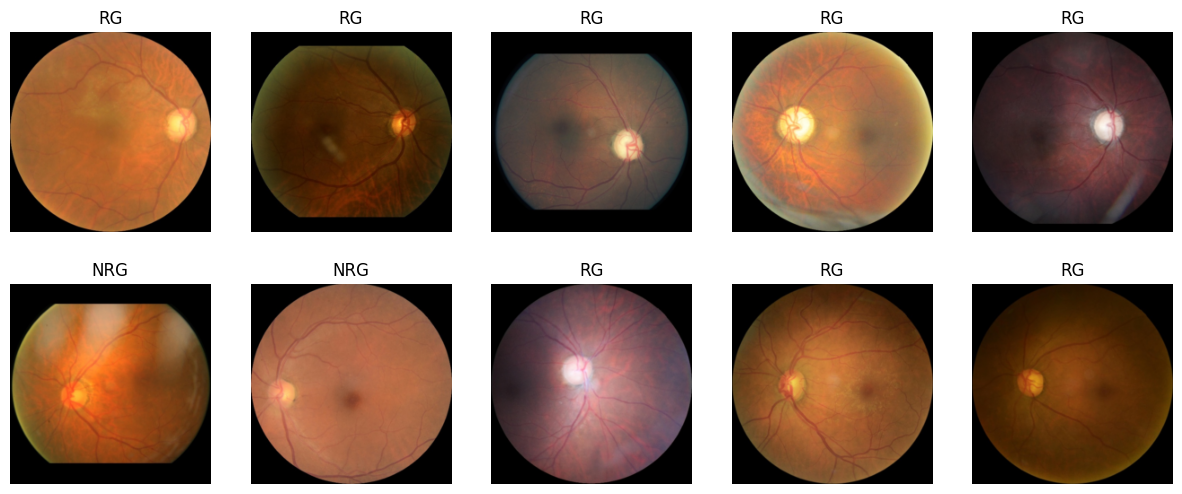

In [5]:
dls = data_loader(path)
dls.train.show_batch(max_n=10, nrows=2)

In [7]:
model = cnn_learner(dls, resnet152, metrics=accuracy)
model.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.857044,0.590323,0.744602,02:25


epoch,train_loss,valid_loss,accuracy,time
0,0.445444,0.390614,0.837283,03:11
1,0.268517,0.395808,0.850974,03:10
2,0.183226,0.423211,0.866772,03:10
3,0.110795,0.373480,0.884150,03:09
4,0.074271,0.386361,0.893102,03:08
5,0.035948,0.431406,0.901000,03:09
6,0.021010,0.416163,0.901527,03:09
7,0.011508,0.398332,0.904687,03:10
8,0.005790,0.415219,0.904160,03:12
9,0.004709,0.418135,0.906793,03:08


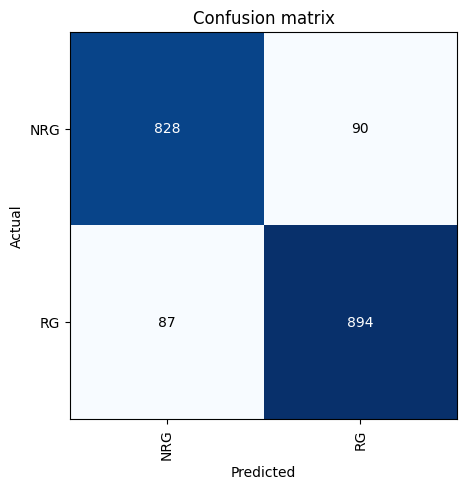

In [8]:
cm = ClassificationInterpretation.from_learner(model)
cm.plot_confusion_matrix()

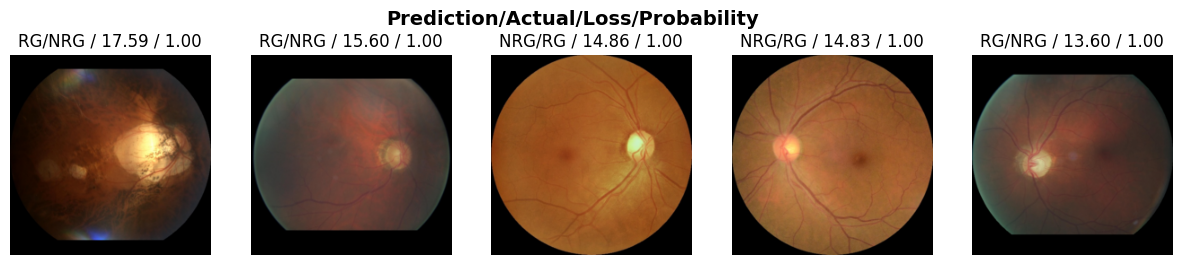

In [9]:
cm.plot_top_losses(5, nrows=1)

In [15]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:RG
Ehtimollik:98.33


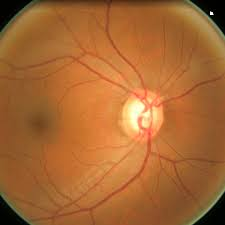

In [18]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = model.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.2f}")
img

In [20]:
model.export("glaucoma_model.pkl")